In [1]:
import json
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
from torchvision.transforms import transforms, v2
import os

In [2]:
datapath = './ArTaxOr/'
annopath = '/annotations'

In [3]:
os.listdir(datapath)

['Araneae',
 'ArTaxOr.png',
 'Coleoptera',
 'Diptera',
 'Hemiptera',
 'Hymenoptera',
 'Lepidoptera',
 'license.txt',
 'Odonata',
 'readme.txt',
 'revision history.txt']

In [4]:
labels = [f for f in os.listdir(datapath) if os.path.isdir(datapath+f)]
labels

['Araneae',
 'Coleoptera',
 'Diptera',
 'Hemiptera',
 'Hymenoptera',
 'Lepidoptera',
 'Odonata']

In [5]:
test = Image.open(r'ArTaxOr\Araneae\0a6b75441f56.jpg')

In [6]:
with open(r'ArTaxOr\Araneae\annotations\0a03fdd613526378da26289bacd48044-asset.json')as f:
    data = json.load(f)
    print(data['asset']['size'])
    print(data['regions'][0]['points'])

{'width': 1920, 'height': 1080}
[{'x': 201.1302549965541, 'y': 350.859375}, {'x': 1475.39627842867, 'y': 350.859375}, {'x': 1475.39627842867, 'y': 738.6534926470588}, {'x': 201.1302549965541, 'y': 738.6534926470588}]


In [7]:
info = {'name':[], 'label':[], 'width':[], 'height':[], 'x1':[], 'y1':[], 'x2':[], 'y2':[]}

# json 파일을 데이터프레임으로 읽을 수 없어서 다시 정리
for label in labels:
    annoList = os.listdir(datapath+label+annopath)
    for anno in annoList:
        with open(datapath+label+annopath+'/'+anno)as f:
            try:
                data = json.load(f)
                info['name'].append(data['asset']['name'])
                info['label'].append(label)
                info['width'].append(data['asset']['size']['width'])
                info['height'].append(data['asset']['size']['height'])
                info['x1'].append(data['regions'][0]['points'][0]['x'])
                info['y1'].append(data['regions'][0]['points'][0]['y'])
                info['x2'].append(data['regions'][0]['points'][2]['x'])
                info['y2'].append(data['regions'][0]['points'][2]['y'])
            except Exception as e:
                print("Error arised : ", e)
                print("Image name : ", anno)

Error arised :  'asset'
Image name :  Araneae.vott
Error arised :  'asset'
Image name :  Coleoptera.vott
Error arised :  'asset'
Image name :  Diptera.vott
Error arised :  'asset'
Image name :  Hemiptera.vott
Error arised :  'asset'
Image name :  Hymenoptera.vott
Error arised :  'asset'
Image name :  Lepidoptera.vott
Error arised :  'asset'
Image name :  Odonata.vott


In [8]:
for k in info.keys():
    print(info[k][0])

4679235f3408.jpg
Araneae
3106
2071
997.5161957270849
530.6000517063082
1847.331495520331
1481.5038779731128


In [9]:
info['name'][0]

'4679235f3408.jpg'

In [10]:
pd.DataFrame(info).to_csv('./annotations.csv')

In [11]:
annotDF = pd.read_csv('./annotations.csv')

In [12]:
testimg = cv2.imread(datapath+labels[0]+'/'+annotDF['name'][0])
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)

In [13]:
bound = annotDF[['x1', 'y1', 'x2', 'y2']].iloc[0].values
bound

array([ 997.51619573,  530.60005171, 1847.33149552, 1481.50387797])

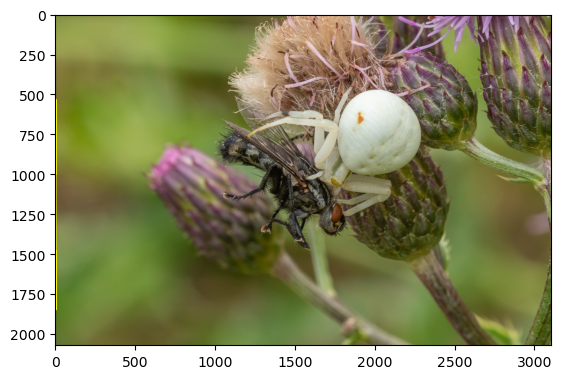

In [14]:
# 샘플 이미지 확인
plt.imshow(testimg)
plt.plot(bound, color='yellow')
plt.show()

In [15]:
# 샘플 이미지와 바운더리 확인
img = Image.open(datapath+labels[0]+'/'+annotDF['name'][0]).convert('RGB')

draw = ImageDraw.Draw(img)
draw.rectangle(bound, outline=(0,255,0), width = 3)

img.show()